# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.sort(['ID', 'Date'], inplace = True)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [6]:
df.set_index('Date', inplace = True)

We have data from 2005 through 2015 during that period we had two leap years 2008 & 2012

removing leap day from both years to maintain consistency

In [7]:
df.drop(['2008-02-29', '2012-02-29'], inplace= True)

In [8]:
df_Till2014 = df.loc['2005-01-01':'2014-12-31']

In [9]:
df_2015 = df.loc['2015-01-01':]

In [10]:
df_Till2014.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151245 entries, 2005-01-01 to 2014-12-31
Data columns (total 3 columns):
ID            151245 non-null object
Element       151245 non-null object
Data_Value    151245 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.6+ MB


In [11]:
# Let's group by Year and Month and add all the maximum and minimum values for the day to a list

# 2005 - 2014

max_till2014 = []
min_till2014 = []

dates = df_Till2014.index

for dates in df_Till2014.groupby([dates.month, dates.day]):
    min_till2014.append((min(dates[1]['Data_Value']))/10)
    max_till2014.append((max(dates[1]['Data_Value']))/10)    

In [12]:
#2015

max2015 = []
min2015 = []

dates = df_2015.index

for dates in df_2015.groupby([dates.month, dates.day]):
    min2015.append(min(dates[1]['Data_Value'])/10)
    max2015.append(max(dates[1]['Data_Value'])/10)   

In [13]:
# Looking for extreme temperature values for year 2015

min_index = []
max_index = []
max_2015 = []
min_2015 = []
for i in range(len(max2015)):
    if max2015[i] > max_till2014[i]:
        max_index.append(i)
        max_2015.append(max2015[i])
        
for i in range(len(min2015)):
    if min2015[i] < min_till2014[i]:
        min_index.append(i)
        min_2015.append(min2015[i])

In [14]:
# creating list of days in an year

import numpy as np
days = np.arange(1, 366)

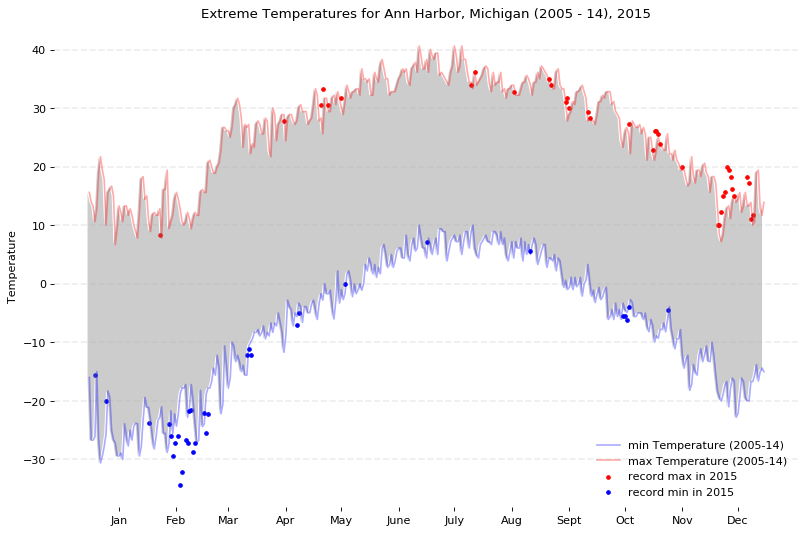

In [30]:

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

#scatter plot of temperatures during 2015
plt.scatter(max_index, max_2015, color = 'red', s = 10, label = 'record max in 2015')
plt.scatter(min_index, min_2015, color = 'blue', s = 10, label = 'record min in 2015')


# plot the min and max temparature data
plt.plot(days, min_till2014, color = 'blue', alpha = 0.33, label = 'min Temperature (2005-14)')
plt.plot(days, max_till2014, color = 'red', alpha = 0.33, label = 'max Temperature (2005-14)')



# fill the area between the min and max temparature data
plt.gca().fill_between(range(len(min_till2014)), 
                       min_till2014, max_till2014, 
                       facecolor='grey', 
                       alpha=0.4)




import datetime as dt

m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
# This is the vital step. It will create a list of day numbers corresponding to middle of each month i.e. 15(Jan), 46(Feb), ... 
ticks = [(dt.date(2017,m,1)-dt.date(2016,12,15)).days for m in range(1,13)]
# It is important to use a non-leap year for this calculation (I used 2017).
# Also, I used (2016,12,15) to substract so that I get middle of each month rather than beginning, it just looks better that way.

plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(m)

plt.ylabel('Temperature')
plt.title('Extreme Temperatures for Ann Harbor, Michigan (2005 - 14), 2015')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# legend    
legend = plt.legend(loc='lower right', shadow=False, frameon = False)
    

# grid lines
plt.grid(linestyle= 'dashed', linewidth=0.33, axis = 'y')
    
plt.show()
